In [1]:
import os
import glob
import json
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import anndata as ad
from sklearn.metrics import adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

import sys
sys.path.append("../../")
from digitalhistopathology.notebooks_utils import sort_retrained_models

# Batch effect (all patches)

In [2]:
# Load configuration
with open("../../config/config_notebooks_TNBC.json", "r") as config_file:
    config = json.load(config_file)

In [3]:
# Plot the bootstrapped ARI patient values
df_boot = pd.DataFrame()
for model_type, names, benchmark_path in zip(
    [config['retrained_model_list1_type'], config['retrained_model_list2_type']],
    [config['retrained_model_list1'], config['retrained_model_list2']],
    [config['retrained_benchmark_folder1'], config['retrained_benchmark_folder2']]):

    path_to_unsupervised_clustering = os.path.join(benchmark_path, "unsupervised_clustering_ARI", "kmeans")
    
    for name in names:
        print(f"Processing {name}...")
        bootstrapped_files = glob.glob(os.path.join(path_to_unsupervised_clustering, f"boostraped_ARI_patient_{name}_10*.json"))
        print(f"Found bootstrapped files: {bootstrapped_files}")
        
        if len(bootstrapped_files) > 0:
            with open(bootstrapped_files[0], "r") as f:
                ari_patient = json.load(f)
                df_boot[name] = ari_patient[name]

Processing uni...
Found bootstrapped files: ['/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/TNBC/benchmark/uni_explora_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_10_patients.json', '/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/TNBC/benchmark/uni_explora_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_10_19_patients.json']
Processing uni_explora_kde_4096_prototypes...
Found bootstrapped files: ['/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/TNBC/benchmark/uni_explora_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_explora_kde_4096_prototypes_10_19_patients.json', '/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/TNBC/benchmark/uni_explora_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_explora_kde_4096_prototypes_10_patients.json']
Proc

In [4]:
for model in df_boot.columns:
    print(f"{model}: {df_boot.mean().loc[model]:.2f} ± {df_boot.std().loc[model]:.2f}")

uni: 0.31 ± 0.06
uni_explora_kde_4096_prototypes: 0.34 ± 0.08
uni_explora_kde_16384_prototypes: 0.27 ± 0.05
uni_explora_kde_65536_prototypes: 0.32 ± 0.08
uni_explora_koleo_4096_prototypes: 0.23 ± 0.04
uni_explora_koleo_16384_prototypes: 0.22 ± 0.06
uni_explora_koleo_65536_prototypes: 0.30 ± 0.07
uni_full_kde_4096_prototypes: 0.17 ± 0.05
uni_full_kde_16384_prototypes: 0.15 ± 0.05
uni_full_kde_65536_prototypes: 0.19 ± 0.06
uni_full_koleo_4096_prototypes: 0.13 ± 0.05
uni_full_koleo_16384_prototypes: 0.11 ± 0.04
uni_full_koleo_65536_prototypes: 0.16 ± 0.03


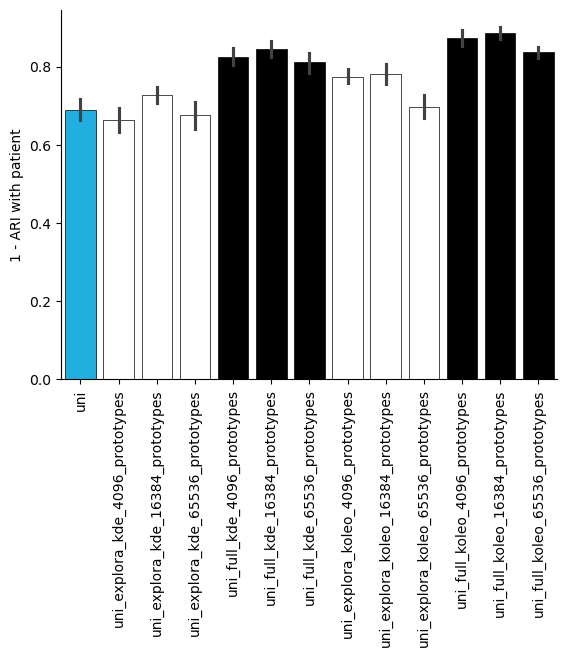

In [5]:
retrained_models = config['retrained_model_list1'] + config['retrained_model_list2']
sorted_retrained_models = sort_retrained_models(retrained_models)

palette = []
for model in sorted_retrained_models:
    if "explora" in model:
        palette.append("white")
    elif "full" in model:
        palette.append("black")
    else:
        palette.append("deepskyblue")

if len(df_boot) > 0:
  df_boot = df_boot.T.loc[sorted_retrained_models].T
  df_boot = 1 - df_boot
  sns.barplot(data=df_boot, palette=palette, linewidth=0.5, edgecolor="black")
  plt.ylabel("1 - ARI with patient")
  plt.xticks(rotation=90)
  sns.despine()
  plt.savefig(os.path.join(config['figures_folder'], "Figure3", f"batch_effect_retrained_models.pdf"), bbox_inches='tight')